In [23]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import plotly.graph_objs as go
import plotly.express as px
# model
#from model import prediction
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from datetime import date, timedelta


In [42]:
## load the data

df=pd.read_csv('AAPL-Final.csv')
df


,Date,Open,High,Low,eps,pe,InRate,InfRate,Close,Adj Close,Volume
0,1/3/2000,0.936384,1.004464,0.907924,0.310000,20.770000,3.411051,1.760000,0.999442,0.853355,535796800
1,1/4/2000,0.966518,0.987723,0.903460,0.188723,21.050533,2.796146,2.488276,0.915179,0.781409,512377600
2,1/5/2000,0.926339,0.987165,0.919643,0.189153,21.045239,2.795518,2.488011,0.928571,0.792844,778321600
3,1/6/2000,0.947545,0.955357,0.848214,0.189583,21.039946,2.794891,2.487746,0.848214,0.724232,767972800
4,1/7/2000,0.861607,0.901786,0.852679,0.190012,21.034654,2.794264,2.487482,0.888393,0.758538,460734400
...,...,...,...,...,...,...,...,...,...,...,...
5531,12/27/2021,177.089996,180.419998,177.070007,1.582562,10.786384,0.520334,1.977604,180.330002,179.586868,74919600
5532,12/28/2021,180.160004,181.330002,178.529999,1.582636,10.787788,0.520138,1.977684,179.289993,178.551132,79144300
5533,12/29/2021,179.330002,180.630005,178.139999,1.582711,10.789193,0.519943,1.977764,179.380005,178.640778,62348900
5534,12/30/2021,179.470001,180.570007,178.089996,1.582785,10.790599,0.519747,1.977845,178.199997,177.465637,59773000


In [43]:
# from google.colab import drive
# drive.mount('/content/drive')

In [44]:
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,eps,pe,InRate,InfRate,Close,Adj Close,Volume
Date,,,,,,,,,,
1/3/2000,0.936384,1.004464,0.907924,0.310000,20.770000,3.411051,1.760000,0.999442,0.853355,535796800
1/4/2000,0.966518,0.987723,0.903460,0.188723,21.050533,2.796146,2.488276,0.915179,0.781409,512377600
1/5/2000,0.926339,0.987165,0.919643,0.189153,21.045239,2.795518,2.488011,0.928571,0.792844,778321600
1/6/2000,0.947545,0.955357,0.848214,0.189583,21.039946,2.794891,2.487746,0.848214,0.724232,767972800
1/7/2000,0.861607,0.901786,0.852679,0.190012,21.034654,2.794264,2.487482,0.888393,0.758538,460734400


In [45]:
df['Close'].dtypes

dtype('float64')

In [46]:
df["Close"].head()

Date
1/3/2000    0.999442
1/4/2000    0.915179
1/5/2000    0.928571
1/6/2000    0.848214
1/7/2000    0.888393
Name: Close, dtype: float64

In [47]:
df["Close"] = df["Close"].astype(str).str.replace(",","")
close = df["Close"].apply(lambda x: float(x))
df["Close"]=df["Close"].apply(pd.to_numeric)

In [48]:
df["Open"] = df["Open"].astype(str).str.replace(",","")
open = df["Close"].apply(lambda x: float(x))

In [49]:
df["High"] = df["High"].astype(str).str.replace(",","")
high = df["High"].apply(lambda x: float(x))

In [50]:
df["Low"] = df["Low"].astype(str).str.replace(",","")
low = df["Low"].apply(lambda x: float(x))

In [51]:
df["Adj Close"] = df["Adj Close"].astype(str).str.replace(",","")
adjclose = df["Adj Close"].apply(lambda x: float(x))

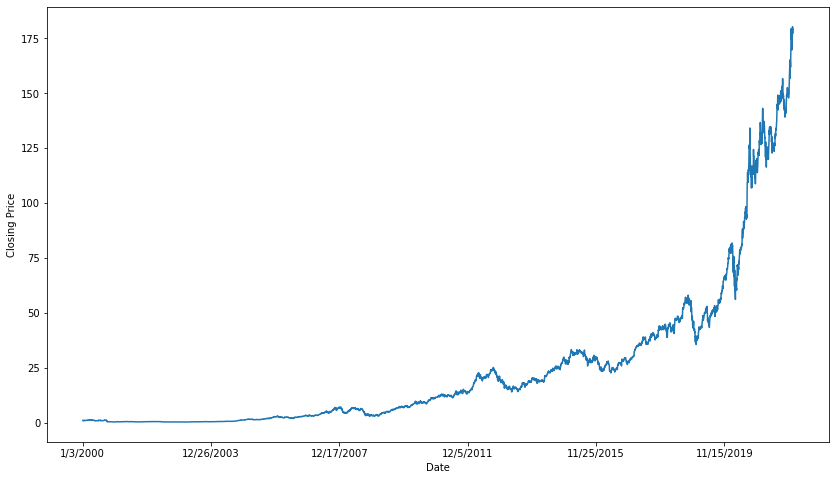

In [52]:
import matplotlib.pyplot as plt
df['Close'].plot(figsize=(14,8))
plt.ylabel("Closing Price")
plt.show()

Data Preprocessing

In [53]:
df.isna().sum() 

Open         0
High         0
Low          0
eps          0
pe           0
InRate       0
InfRate      0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [54]:
df["Close"].value_counts()

0.267857      6
0.348214      6
0.265179      5
0.262500      4
0.256429      4
             ..
3.478571      1
3.638929      1
3.498214      1
3.717143      1
177.570007    1
Name: Close, Length: 5057, dtype: int64

In [55]:
df.value_counts()

Open        High        Low         eps       pe         InRate    InfRate   Close       Adj Close   Volume    
0.231964    0.244107    0.230714    0.520628  17.162533  2.306215  2.291470  0.236429    0.201871    1016176000    1
3.285357    3.357143    3.273214    0.861585  13.736580  1.787913  2.111005  3.352500    2.862472    686896000     1
3.303929    3.327143    3.196429    0.837267  13.954909  1.687106  2.330000  3.197857    2.730433    1074836000    1
3.301071    3.33        3.214643    0.986667  12.693451  1.592028  2.053108  3.218571    2.748118    1178976400    1
3.293214    3.31        3.252143    0.838221  13.946249  1.824093  2.122413  3.273571    2.795079    870486400     1
                                                                                                                  ..
128.960007  129.100006  126.120003  1.561417  10.489156  0.572979  1.959141  126.660004  125.365196  192541500     1
128.949997  130.389999  128.520004  1.567962  10.558083  0.557236  1.

In [56]:
df.head()

,Open,High,Low,eps,pe,InRate,InfRate,Close,Adj Close,Volume
Date,,,,,,,,,,
1/3/2000,0.936384,1.004464,0.907924,0.310000,20.770000,3.411051,1.760000,0.999442,0.853355,535796800
1/4/2000,0.966518,0.987723,0.90346,0.188723,21.050533,2.796146,2.488276,0.915179,0.781409,512377600
1/5/2000,0.926339,0.987165,0.919643,0.189153,21.045239,2.795518,2.488011,0.928571,0.792844,778321600
1/6/2000,0.947545,0.955357,0.848214,0.189583,21.039946,2.794891,2.487746,0.848214,0.724232,767972800
1/7/2000,0.861607,0.901786,0.852679,0.190012,21.034654,2.794264,2.487482,0.888393,0.758538,460734400


In [57]:
df.drop('Volume', axis=1, inplace=True)

In [58]:
df.head()

,Open,High,Low,eps,pe,InRate,InfRate,Close,Adj Close
Date,,,,,,,,,
1/3/2000,0.936384,1.004464,0.907924,0.310000,20.770000,3.411051,1.760000,0.999442,0.853355
1/4/2000,0.966518,0.987723,0.90346,0.188723,21.050533,2.796146,2.488276,0.915179,0.781409
1/5/2000,0.926339,0.987165,0.919643,0.189153,21.045239,2.795518,2.488011,0.928571,0.792844
1/6/2000,0.947545,0.955357,0.848214,0.189583,21.039946,2.794891,2.487746,0.848214,0.724232
1/7/2000,0.861607,0.901786,0.852679,0.190012,21.034654,2.794264,2.487482,0.888393,0.758538


Feature Selection

In [59]:
x = df.iloc[:, 0:9].values
x

array([['0.936384', '1.004464', '0.907924', ..., 1.76, 0.999442,
        '0.853355'],
       ['0.966518', '0.987723', '0.90346', ..., 2.48827564, 0.915179,
        '0.781409'],
       ['0.926339', '0.987165', '0.919643', ..., 2.488010875, 0.928571,
        '0.792844'],
       ...,
       ['179.330002', '180.630005', '178.139999', ..., 1.97776447,
        179.380005, '178.640778'],
       ['179.470001', '180.570007', '178.089996', ..., 1.977844731,
        178.199997, '177.465637'],
       ['178.089996', '179.229996', '177.259995', ..., 1.977925055,
        177.570007, '176.838242']], dtype=object)

In [60]:
y = df.iloc[:, 8].values
y

array(['0.853355', '0.781409', '0.792844', ..., '178.640778',
       '177.465637', '176.838242'], dtype=object)

Spliting The dataset into train and test

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=0)

In [62]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)


Hyperparameter Tuning For a support vector regression model, we are considering the follwing parameters:

c — Regularization parameter


gamma — Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.


Kernel — Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.


In [63]:
# from sklearn.model_selection import RandomizedSearchCV
# svm = {
#     'C': [0.1, 1, 10, 100, 1000], 
#     'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#     'kernel': ['rbf','linear', 'poly', 'sigmoid']
#     }


# rscv = RandomizedSearchCV(SVR(),param_distributions=svm,cv=10,n_iter=10,verbose=True,n_jobs=-1)
# rscv_fit = rscv.fit(X_train, y_train)
# best_parameters = rscv_fit.best_params_
# print(best_parameters)

In [64]:
model = SVR(kernel= 'linear', gamma= 0.0001, C=100)
model.fit(X_train,y_train)

SVR(C=100, gamma=0.0001, kernel='linear')

In [65]:
predict = model.predict(X_test)
predict


array([  0.95460037,   5.94109509,   0.36217733, ...,   0.27252211,
       135.49373165,   0.3836559 ])

In [66]:
print(predict.shape)

(1108,)


In [67]:
import sklearn.metrics as metrics

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 5))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 5))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 5))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 5))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Support Vector Regressor.')
             

Mean Absolute Error: 0.04508
Mean Squared Error: 0.00271
Root Mean Squared Error: 0.05208
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Support Vector Regressor.


In [69]:
df.index

Index(['1/3/2000', '1/4/2000', '1/5/2000', '1/6/2000', '1/7/2000', '1/10/2000',
       '1/11/2000', '1/12/2000', '1/13/2000', '1/14/2000',
       ...
       '12/17/2021', '12/20/2021', '12/21/2021', '12/22/2021', '12/23/2021',
       '12/27/2021', '12/28/2021', '12/29/2021', '12/30/2021', '12/31/2021'],
      dtype='object', name='Date', length=5536)

In [70]:
df.index[0]

'1/3/2000'

In [71]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))

In [72]:
predictions

,Predictions
2021-12-31,0.954600
2022-01-01,5.941095
2022-01-02,0.362177
2022-01-03,26.483950
2022-01-04,41.924356
...,...
2025-01-07,0.503836
2025-01-08,30.164378
2025-01-09,0.272522
2025-01-10,135.493732


In [73]:
tendays_df_pred = pd.DataFrame(predictions[:10])

In [74]:
tendays_df_pred

,Predictions
2021-12-31,0.954600
2022-01-01,5.941095
2022-01-02,0.362177
2022-01-03,26.483950
2022-01-04,41.924356
2022-01-05,0.341379
2022-01-06,1.061718
2022-01-07,118.877724
2022-01-08,0.256381
2022-01-09,24.269682


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


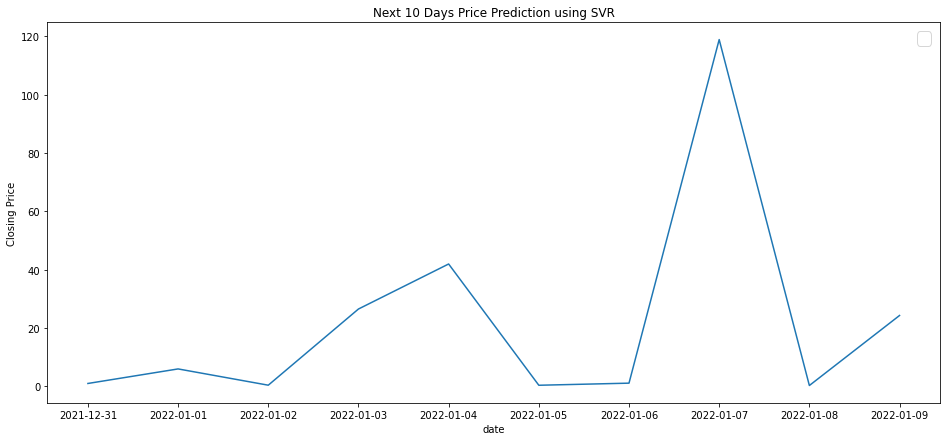

In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# predictions[len(tendays_df_pred)+(look_back*2)+1:len(df)-1, :] = test_predict
plt.figure(figsize = (16,7))
plt.title('Next 10 Days Price Prediction using SVR')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend(fontsize=18)
plt.plot(tendays_df_pred)
plt.show()